[336, 336, 404, 387, 140, 475, 472, 470, 478, 446, 470, 384]
[342, 342, 412, 396, 150, 486, 484, 487, 495, 471, 495, 469]
[6, 6, 8, 9, 10, 11, 12, 17, 17, 25, 25, 85]


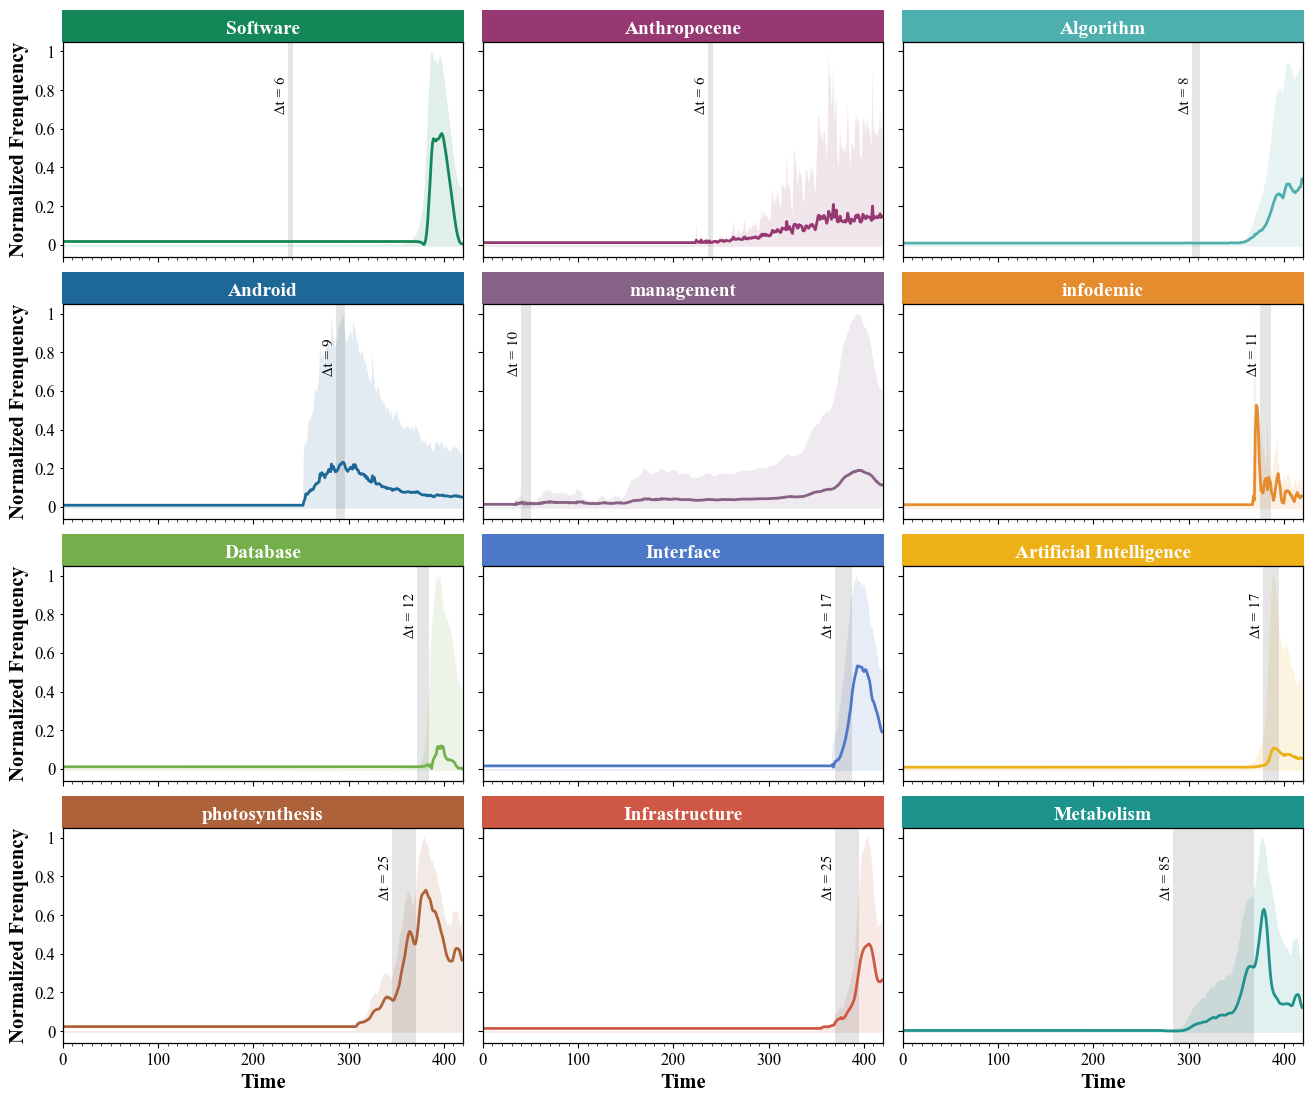

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator

plt.rcParams['font.family'] = 'Times New Roman'

def draw(fig, real,prediction,sheet_name,time,time2,i, color):

    ax = fig.add_subplot(4,3,i)

    ax.grid(False)
    # 真实数据
    # ax.plot(real[0, :, 0], label="GBNC", linewidth=1)
    plt.fill_between([i for i in range(len(real))], real, -0.01, facecolor=color, alpha=0.13)
    # 预测数据
    # ax.plot(prediction[0, :, 0], label="CfC_output", linewidth=2)
    ax.plot(prediction, linewidth=2, color = color)

    ax.spines['top'].set_linewidth(0.9)
    ax.spines['left'].set_linewidth(0.9)
    ax.spines['right'].set_linewidth(0.9)
    ax.spines['bottom'].set_linewidth(0.9)
    ax.set_xlim(0, len(real))

    # 自定义刻度
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1],['', '', '', '', '', ''])
#     plt.xticks([250, 350, 450, 500], ['', '', '', ''])
    if i==12 or i==3 or i==6 or i==9:
        ax.set_xlim(100,520)
        plt.xticks([100, 200,300,400,500], ['','','', '',''])
        ax.tick_params(axis='x',which='minor',direction='out',width=0.5,length=2.5)
        ax.xaxis.set_minor_locator(MultipleLocator(10))
    if i==11 or i==8 or i==5 or i==2:
        ax.set_xlim(100,520)   
        plt.xticks([100, 200,300,400,500], ['','','', '',''])
        ax.tick_params(axis='x',which='minor',direction='out',width=0.5,length=2.5)
        ax.xaxis.set_minor_locator(MultipleLocator(10))
    if i==10 or i==7 or i==4 or i==1:
        ax.set_xlim(100,520)
        plt.xticks([100, 200,300,400,500], ['','','', '',''])
        ax.tick_params(axis='x',which='minor',direction='out',width=0.5,length=2.5)
        ax.xaxis.set_minor_locator(MultipleLocator(10))
    if i==12: # 有x轴
        ax.set_xlabel('Time', fontsize=16, weight = 'bold')
        plt.xticks([100, 200,300,400,500], ['0', '100','200','300','400'], fontsize=13)
    if i==11: # 有x轴
        ax.set_xlabel('Time', fontsize=16, weight = 'bold')
        plt.xticks([100, 200,300,400,500], ['0', '100','200','300','400'], fontsize=13)
    if i==10: # 有x轴
        ax.set_xlabel('Time', fontsize=16, weight = 'bold')
        plt.xticks([100, 200,300,400,500], ['0', '100','200','300','400'], fontsize=13)
    if i==1 or i==4 or i==7 or i==10: # 有y轴
        ax.set_ylabel('Normalized Frenquency', fontsize=16, weight = 'bold')   
        ax.tick_params(axis="y", left=True, length=2)
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0', '0.2', '0.4', '0.6', '0.8', '1'], fontsize=13)
   
    

    
    ymin,ymax = ax.get_ylim()
    rect = Rectangle((time, ymin), time2 - time, ymax - ymin, facecolor='black', edgecolor='none', alpha=0.1)
    ax.add_patch(rect)
    # ax.vlines(time, ymin, ymax, 'black', '--',linewidth=0.6,alpha=0.2) # 垂直1
    # ax.vlines(time2, ymin, ymax, 'black', '--', linewidth=0.6,alpha=0.2)  # 垂直2
    ax.set_ylim(ymin,ymax)
    ##############3
    ax.text(time, (ymin + ymax) / 2+0.2, f'∆t = {time2-time}', rotation=90, horizontalalignment='right', fontsize=15)
    
    title_obj = ax.set_title(sheet_name, weight='bold', color='white',size=17)
    # 获取标题的位置
    tx, ty = title_obj.get_position()
    # 创建一个矩形作为背景，可以修改矩形的大小和位置来适应你的需求
    # Rectangle参数：xy为左下角位置, width为宽度, height为高度
    # xycoords='axes fraction' 表示我们将坐标系设置为 axes 百分比
    # facecolor为矩形的颜色，alpha为透明度
    bbox = Rectangle((tx - 0.502, ty), width=1.0035, height=0.15, facecolor=color, alpha=1, transform=ax.transAxes,
                     clip_on=False)
    # 将矩形添加到 axes
    ax.add_patch(bbox)
    # 调整标题的 zorder 使其显示在矩形之上
    title_obj.set_zorder(1)


lists = ["Software", "Anthropocene","Algorithm","Android","management","infodemic","Database", "Interface","Artificial Intelligence","photosynthesis",  "Infrastructure",  "Metabolism" ]
times = [336, 336, 404, 387,140,475, 472,470, 478, 446,  470,   384] # 标记训练数据长度
times2 = [342, 342,412,396, 150,486, 484,487, 495, 471,  495,   469] # 标记预测数据峰值
colors = ['#148758', '#963972', '#4EB0AE', '#1E6897', '#876287', '#E58D2E', '#74AF4B', '#4D78C8', '#EDB117', '#AD6239', '#CE5745', '#1E938D']

print(times)
print(times2)
print([j-i for i,j in zip(times,times2)])

fig = plt.figure(figsize=(16, 13))
plt.subplots_adjust(hspace=0.22,wspace=0.05)

i = 1
for list,time,time2,color in zip(lists,times,times2,colors):
    real = pd.read_excel("./CfC data.xlsx", sheet_name=list, usecols=[1])["real"].tolist()
    prediction = pd.read_excel("./CfC data.xlsx", sheet_name=list, usecols=[2])["predict"].tolist()
    draw(fig, real, prediction, list, time, time2, i, color)
    i+=1
plt.savefig('./figures/all terms_300dpi.jpg', bbox_inches='tight', dpi=300)
plt.show()